# Assignment 5. SPARQL queries
## Gema Castillo García

**Create the SPARQL query that will answer each of these questions.**

*The query of Q5 overloaded the Jupyter kernel and it was impossible for me to get it to work in this notebook. Therefore, I attach a screenshot of the results obtained on the web server (i.e. the endpoint).*

### UniProt SPARQL Endpoint:  http://sparql.uniprot.org/sparql

In [1]:
%endpoint https://sparql.uniprot.org/sparql
%format JSON

Endpoint set to: https://sparql.uniprot.org/sparql
Return format: JSON

**Q1: 1 POINT  How many protein records are in UniProt?**

In [2]:
PREFIX up:<http://purl.uniprot.org/core/> 

#SELECT (COUNT (DISTINCT ?protein) AS ?ProteinRecords)
#I had to remove 'DISTINCT' because it overloaded the kernel, but ideally I would have done the query using it
SELECT (COUNT (?protein) AS ?ProteinRecords)
WHERE 
{
    ?protein a up:Protein .
}

ProteinRecords
360157660


**Q2: 1 POINT How many Arabidopsis thaliana protein records are in UniProt?**

In [3]:
PREFIX up:<http://purl.uniprot.org/core/> 
PREFIX taxon:<http://purl.uniprot.org/taxonomy/> 

SELECT (COUNT(DISTINCT ?protein) AS ?ProteinRecords)
WHERE 
{
    ?protein a up:Protein .
    ?protein up:organism taxon:3702 .
}

ProteinRecords
136782


**Q3: 1 POINT retrieve pictures of Arabidopsis thaliana from UniProt?**

In [4]:
PREFIX up: <http://purl.uniprot.org/core/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>

SELECT DISTINCT ?Images
WHERE
{
    ?organism up:scientificName "Arabidopsis thaliana" .
    ?organism foaf:depiction ?Images .
}

Images
https://upload.wikimedia.org/wikipedia/commons/3/39/Arabidopsis.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/Arabidopsis_thaliana_inflorescencias.jpg/800px-Arabidopsis_thaliana_inflorescencias.jpg


**Q4: 1 POINT:  What is the description of the enzyme activity of UniProt Protein Q9SZZ8**

In [5]:
PREFIX up:<http://purl.uniprot.org/core/>
PREFIX rdfs:<http://www.w3.org/2000/01/rdf-schema#> 
PREFIX uniprotkb:<http://purl.uniprot.org/uniprot/>

SELECT ?Q9SZZ8_Activity
WHERE
{
    uniprotkb:Q9SZZ8 up:enzyme ?enzyme .
    ?enzyme up:activity ?act .
    ?act rdfs:label ?Q9SZZ8_Activity.
}

Q9SZZ8_Activity
Beta-carotene + 4 reduced ferredoxin [iron-sulfur] cluster + 2 H(+) + 2 O(2) = zeaxanthin + 4 oxidized ferredoxin [iron-sulfur] cluster + 2 H(2)O.


**Q5: 1 POINT:  Retrieve the proteins ids, and date of submission, for proteins that have been added to UniProt this year   (HINT Google for “SPARQL FILTER by date”)**

In [ ]:
PREFIX up:<http://purl.uniprot.org/core/> 
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?Protein_ID ?Submission_Date 
WHERE
{
    ?protein a up:Protein . 
    ?protein up:created ?Submission_Date  .
    BIND (SUBSTR(STR(?protein),33) AS ?Protein_ID)
    #selecting proteins that have been added to UniProt in 2021 because there is none in 2022 
    FILTER (?Submission_Date  >= '2021-01-01'^^xsd:date)
}

There are so many pages like the one shown in this screenshot, that Jupyter cannot display the full output of this query.


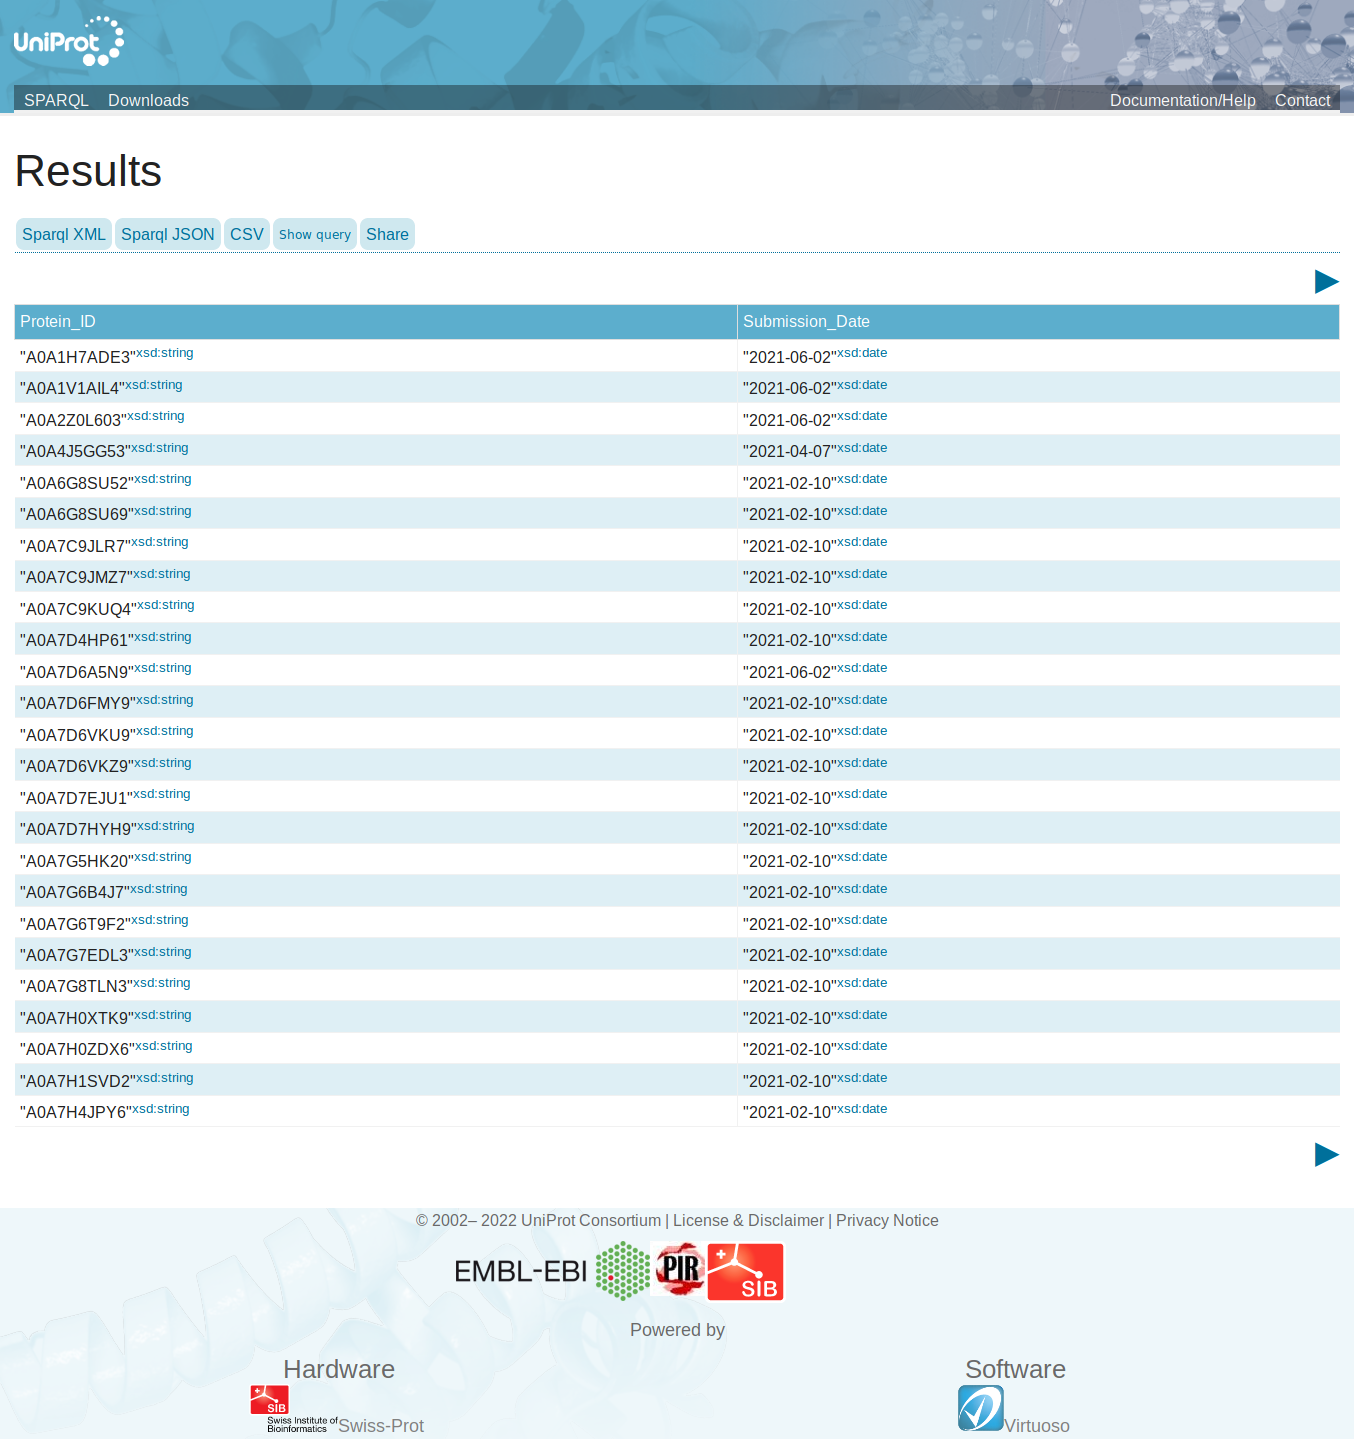

**Q6: 1 POINT How  many species are in the UniProt taxonomy?**

In [6]:
PREFIX up:<http://purl.uniprot.org/core/> 
 
SELECT (COUNT (DISTINCT ?species) AS ?SpeciesCount)
WHERE
{
    ?species a up:Taxon .
    ?species up:rank up:Species .
}

SpeciesCount
2029846


**Q7: 2 POINT  How many species have at least one protein record? (this might take a long time to execute, so do this one last!)**

In [7]:
PREFIX up:<http://purl.uniprot.org/core/> 

SELECT (COUNT(DISTINCT ?species) AS ?SpeciesCount)
WHERE 
{
    ?protein a up:Protein .
    ?protein up:organism ?species .
    ?species a up:Taxon .
    ?species up:rank up:Species .
}

SpeciesCount
1057158


**Q8: 3 points:  find the AGI codes and gene names for all Arabidopsis thaliana  proteins that have a protein function annotation description that mentions “pattern formation”**

In [8]:
PREFIX up: <http://purl.uniprot.org/core/>

SELECT DISTINCT ?AGI ?GeneName

WHERE
{
    ?protein a up:Protein .
    ?protein up:organism ?organism .
    ?organism up:scientificName "Arabidopsis thaliana" .
    ?protein up:encodedBy ?gene .
    ?gene skos:prefLabel ?GeneName .
    ?gene up:locusName ?AGI .
    ?protein up:annotation ?annotation .
        ?annotation rdfs:comment ?text .
        FILTER (CONTAINS(?text, "pattern formation"))
}

AGI,GeneName
At3g54220,SCR
At4g21750,ATML1
At1g13980,GN
At5g40260,SWEET8
At1g69670,CUL3B
At1g63700,YDA
At2g46710,ROPGAP3
At1g26830,CUL3A
At1g55325,MED13
At3g09090,DEX1


### From the MetaNetX metabolic networks for metagenomics database SPARQL Endpoint: https://rdf.metanetx.org/sparql (this slide deck will make it much easier for you!  https://www.metanetx.org/cgi-bin/mnxget/mnxref/MetaNetX_RDF_schema.pdf)

In [9]:
%endpoint https://rdf.metanetx.org/sparql
%format JSON

Endpoint set to: https://rdf.metanetx.org/sparql
Return format: JSON

**Q9: 4 POINTS:  what is the MetaNetX Reaction identifier (starts with “mnxr”) for the UniProt Protein uniprotkb:Q18A79**

In [10]:
PREFIX up: <http://purl.uniprot.org/uniprot/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX mnx: <https://rdf.metanetx.org/schema/>

SELECT DISTINCT ?MetaNetX_ID
WHERE{
    ?pept mnx:peptXref up:Q18A79 .
    ?cata mnx:pept ?pept .
    ?gpr mnx:cata ?cata ;
         mnx:reac ?reac .
    ?reac rdfs:label ?MetaNetX_ID .
}

MetaNetX_ID
mnxr165934
mnxr145046c3


### FEDERATED QUERY - UniProt and MetaNetX

**Q10: 5 POINTS:  What is the official Gene ID (UniProt calls this a “mnemonic”) and the MetaNetX Reaction identifier (mnxr…..) for the protein that has “Starch synthase” catalytic activity in Clostridium difficile (taxon 272563).**

In [11]:
PREFIX up:<http://purl.uniprot.org/core/> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX mnx: <https://rdf.metanetx.org/schema/>
PREFIX taxon: <http://purl.uniprot.org/taxonomy/>

SELECT DISTINCT ?GeneID ?MetaNetXID
WHERE
{
  service <http://sparql.uniprot.org/sparql> {
    ?protein a up:Protein .
    ?protein up:organism taxon:272563 .
    ?protein up:mnemonic ?GeneID .
    ?protein up:classifiedWith ?goTerm .
    ?goTerm rdfs:label ?activity .
    filter contains(?activity, "starch synthase")
    bind (substr(str(?protein),33) as ?ac)
    bind (IRI(CONCAT("http://purl.uniprot.org/uniprot/",?ac)) as ?proteinRef)
  }
  service <https://rdf.metanetx.org/sparql> {
    ?pept mnx:peptXref ?proteinRef .
    ?cata mnx:pept ?pept .
    ?gpr mnx:cata ?cata ;
         mnx:reac ?reac .
    ?reac rdfs:label ?MetaNetXID .
  }
} 

GeneID,MetaNetXID
GLGA_CLOD6,mnxr165934
GLGA_CLOD6,mnxr145046c3


It is the same gene as in **Q9**.